# <font color=#003d5c>REGRESIÓN LINEAL</font>

Importar las librerías de pandas y numpy

In [3]:
# Lectura de dataset de casas 'house_price_dataset.csv' y darle una vista rapida



,area,habitaciones,precio
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Index(['area', 'habitaciones', 'precio'], dtype='object')

Importar librerías de visualización

Gráfica de dispersión

Text(0,0.5,'Precio')

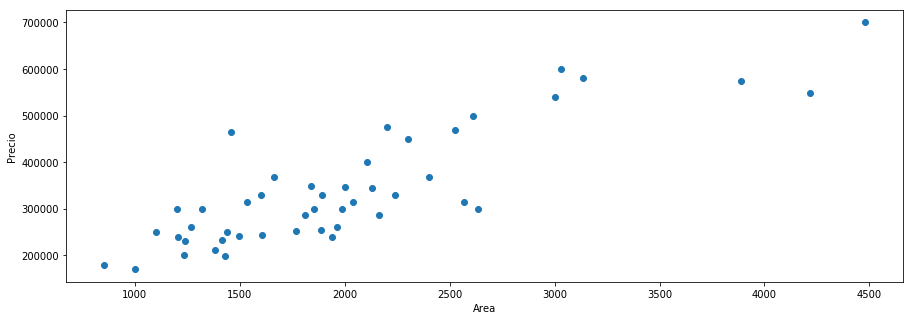

In [6]:
fig = plt.figure(figsize=(15, 5))
y = data['precio'].values
X = data['area'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Precio')

# <font color=#003d5c>Normalizar los datos</font>
Significa que a cada valor de una variable se le restará la media y se le dividirá por la desviación estandar de tal manera que las variables tengan una escala en común.

## $$ x = \frac{x -\overline x}{\sigma_x} $$ 

Text(0,0.5,'Precio')

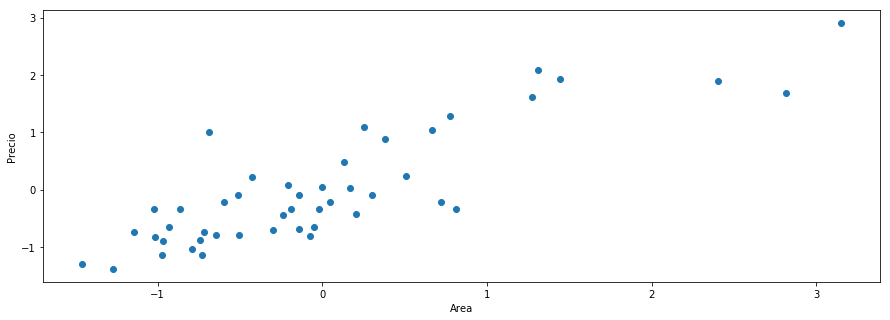

## <font color=#003d5c>Forma de una Regresión Lineal</font>

## $$\hat{y}(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $\hat{y}(x)$ es el resultado
- $\beta_0$ es el intercepto
- $\beta_1$ es el coeficiente para $x_1$ (la primera variable)
- $\beta_n$ es el coeficiente para $x_n$ (la n-ésima variable)

Los valores $\beta$ son llamados los **coeficientes del modelo**:

- Estos valores son estimados (o "aprendidos") durante el proceso de ajuste (entrenamiento) del modelo usando el **criterio de mínimos cuadrados**.
- Específicamente, encontramos la línea (matemáticamente) que minimiza la **suma de los residuos cuadráticos** (o suma de los errores cuadráticos).
- Una vez obtenidos los coeficientes, se puede usar el modelo para predecir una respuesta.

![Estimating coefficients](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/estimating_coefficients.png)

En el diagrama presentado:

- Los puntos negros son los **valores observados** de "x" y "y".
- La línea azul es nuestra **línea de mínimos cuadrados**.
- Las líneas rojas son **residuales**, que son las distancias verticales entre los valores observados y la línea de mínimos cuadrados.

¿Pero cómo se obtiene esta **línea de mínimos cuadrados**?

### <font color=#003d5c>Función de Costos</font>

El objetivo es estimar los parametros $\beta$ que minimicen la suma de los residuos cuadrados.

## $$J(\beta_0, \beta_1)=\frac{1}{2N}\sum_{i=1}^N (\hat{y}_\beta(x_i)-y_i)^2$$

In [8]:
# crear "X" e "y"



Imaginemos que tengamos los siguientes coeficientes betas

In [9]:
beta_ini = np.array([-1, 1])

In [10]:
# Fórmula de la regresión lineal para calcular el y
def rl_y(beta,x):
    return np.dot(beta, x.T)

Text(0,0.5,'Precio')

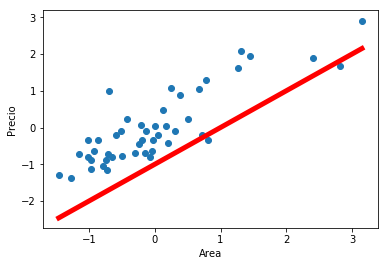

In [11]:
# Gráfico de dispersión


# Gráfico de la regresión lineal
x = np.c_[np.ones(2), [X.min(), X.max()]]
plt.plot(x[:, 1], rl_y(beta_ini, x), 'r', lw=5)
plt.xlabel('Area')
plt.ylabel('Precio')

Vamos a calcular el error de tal regresión

In [12]:
# Función de costo
def funcion_costo_rl(beta, x, y):
    # Puede ser vectorizado
    res = 0
    for i in range(x.shape[0]):
        res += (rl_y(beta,x[i, :]) - y[i]) ** 2
    res *= 1 / (2*x.shape[0])
    return res



0.6450124071218748

### <font color=#003d5c>Entendiendo la función de Costo</font>

Veamos cómo la función de costos se ve para diferentes valores de $\beta$

array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
       -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
       -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
        -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39])

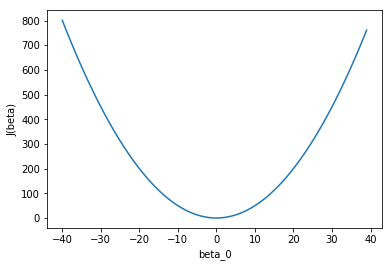

In [15]:
funcion_costo_l=[]
for beta_0 in beta0:
    funcion_costo_l.append(funcion_costo_rl(np.array([beta_0, beta1]), X_, y) )

plt.plot(beta0, funcion_costo_l)
plt.xlabel('beta_0')
p = plt.ylabel('J(beta)')

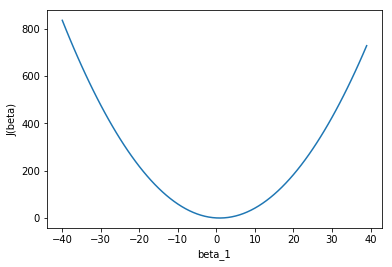

In [17]:
funcion_costo_l=[]
for beta_1 in beta1:
    funcion_costo_l.append(funcion_costo_rl(np.array([beta0, beta_1]), X_, y) )

plt.plot(beta1, funcion_costo_l)
plt.xlabel('beta_1')
p = plt.ylabel('J(beta)')

Analizar ambos al mismo tiempo

In [19]:
funcion_costo_Df = pd.DataFrame(index=beta0, columns=beta1)

for beta_0 in beta0:
    for beta_1 in beta1:
        

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

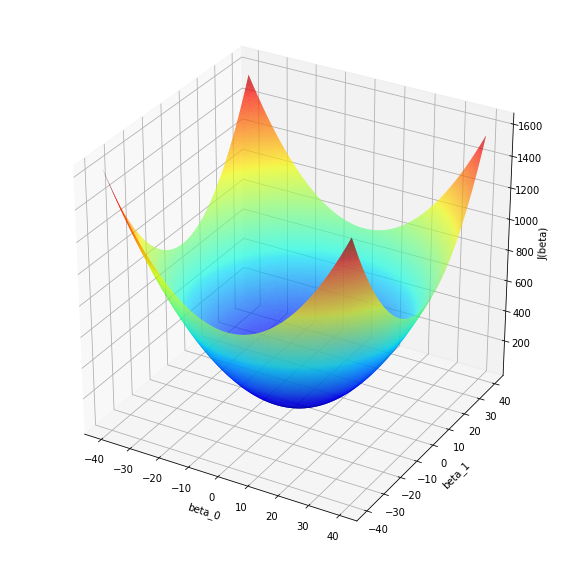

In [21]:
betas = np.transpose([np.tile(beta0, beta1.shape[0]), np.repeat(beta1, beta0.shape[0])])
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(betas[:, 0], betas[:, 1], funcion_costo_Df.T.values.flatten(), cmap=cm.jet, linewidth=0.1)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')
ax.set_zlabel('J(beta)')
plt.show()

También se puede ver como una gráfica de contorno

Text(0,0.5,'beta_1')

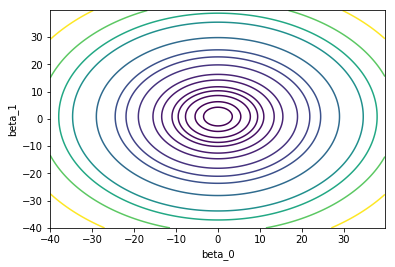

In [22]:
niveles_contorno = [0, 6.0, 15.0, 30.0, 45.0, 60, 90.0, 120, 180, 240, 300, 420, 600, 720, 900, 1200]
plt.contour(beta0, beta1, funcion_costo_Df.T.values, niveles_contorno)
plt.xlabel('beta_0')
plt.ylabel('beta_1')

Permite entender cómo se observan diferentes valores de betas en la trama de contorno

In [23]:
betas = np.array([[0, 0],
                 [-1, -1],
                 [-5, 5],
                 [3, -2]])



Regresión Lineal con betas [0 0]


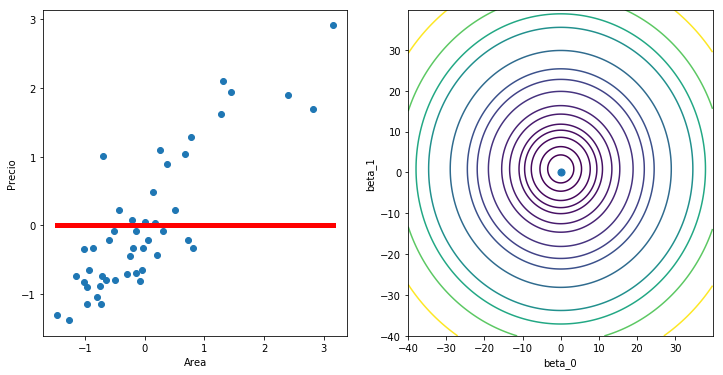



Regresión Lineal con betas [-1 -1]


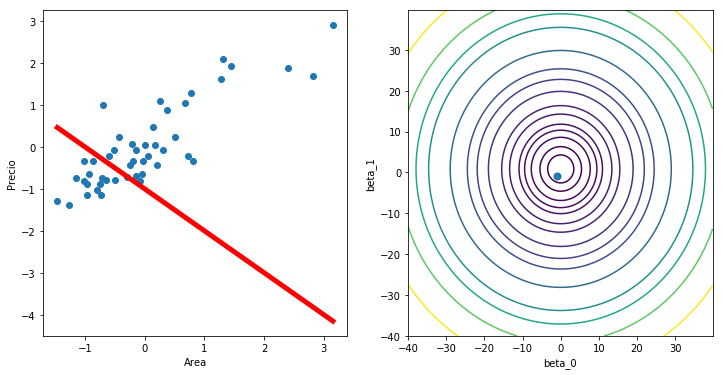



Regresión Lineal con betas [-5  5]


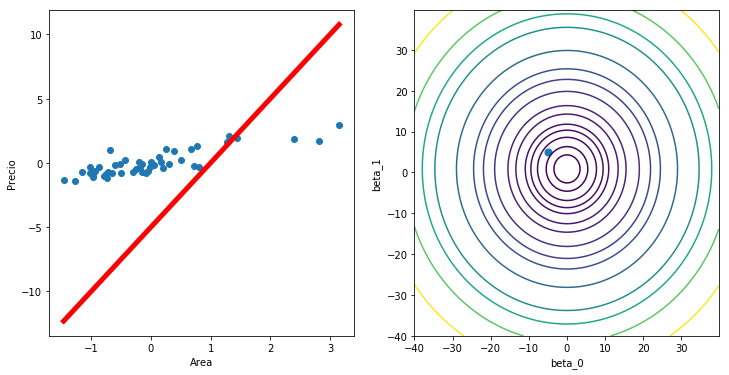



Regresión Lineal con betas [ 3 -2]


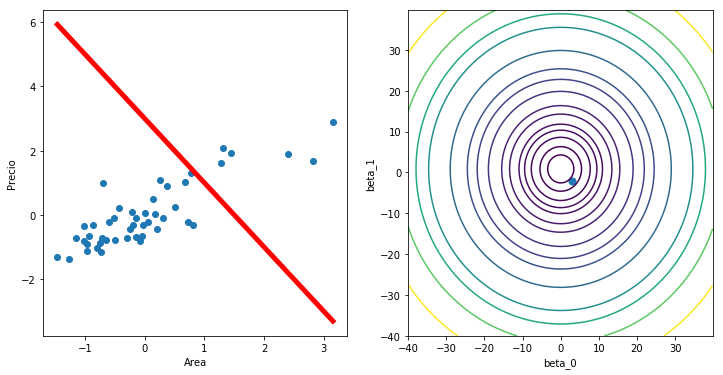

In [24]:
for beta in betas:
    print('\n\nRegresión Lineal con betas', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax2.contour(beta0, beta1, funcion_costo_Df.T.values, niveles_contorno)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1], s=50)

    # Gráfica de dispersión
    ax1.scatter(X, y)

    # Graficar la regresión Lineal
    x = np.c_[np.ones(2), [X.min(), X.max()]]
    ax1.plot(x[:, 1], rl_y(beta, x), 'r', lw=5)
    ax1.set_xlabel('Area')
    ax1.set_ylabel('Precio')
    plt.show()

## <font color=#003d5c>Descenso de Gradiente</font>

Dada una función $J(\beta_0, \beta_1)$

Objetivo: $\min_{\beta_0, \beta_1}J(\beta_0, \beta_1)$

Lógica:

* Comenzar con cualquier $\beta_0, \beta_1$

* Ir cambiando $\beta_0, \beta_1$ de tal manera que se reduzca $J(\beta_0, \beta_1)$
hasta que sea el mínimo posible

### <font color=#003d5c>Algoritmo de descenso de Gradiente</font>

Repetir hasta converger{

## $$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1)$$


}

mientras simultáneamente actualizamos j=0 y j=1

$\alpha$ es conocido como el **ratio de aprendizaje** (learning rate)

Para el caso particular de la regresión lineal con una variable e intercepto, la gradiente se calcula de la siguiente forma:


### $$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (\hat{y}_\beta(x_i)-y_i)^2$$

### $$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)^2$$

### $ j = 0: \frac{\partial }{\partial \beta_0} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

### $ j = 1: \frac{\partial }{\partial \beta_1} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$


### <font color=#003d5c>Algoritmo de descenso de Gradiente</font>

Repetir hasta converger{

### $ \beta_0 := \beta_0- \alpha  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

### $ \beta_1 := \beta_1- \alpha   \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$
}

Simultáneamente!

### <font color=#003d5c>Calcular gradiente</font>

In [25]:
# Cálculo de gradiente
beta_ini = np.array([-1.5, 0.])

def gradiente(beta, x, y):
    
    gradient_0  = 1 / x.shape[0] * ((rl_y(beta, x) - y).sum())
    gradient_1  = 1 / x.shape[0] * ((rl_y(beta, x) - y)* x[:, 1]).sum()

    return np.array([gradient_0, gradient_1])

gradiente(beta_ini, X_, y)

array([-1.5       , -0.85498759])

### <font color=#003d5c>Algoritmo de Descenso de Gradiente</font>

In [26]:
def descenso_gradiente(x, y, beta_ini, alpha, iters): 
    betas = np.zeros((iters, beta_ini.shape[0] + 1))

    beta = beta_ini
    for iter_ in range(iters):

        betas[iter_, :-1] = beta
        betas[iter_, -1] = funcion_costo_rl(beta, x, y)
        beta -= alpha * gradiente(beta, x, y)
        
    return betas

In [27]:
iters = 100
alpha = 0.05
beta_ini = np.array([-4., -4.])

betas =  descenso_gradiente(X_, y, beta_ini, alpha, iters)

Veamos la evolución del costo por iteración

Text(0,0.5,'J(beta)')

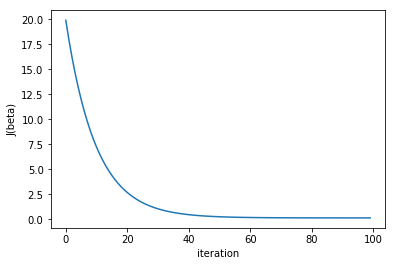

In [28]:
plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)')

¿Qué está haciendo en cada iteración?

In [29]:
import itertools



Regresión Lineal con betas [-4. -4.]


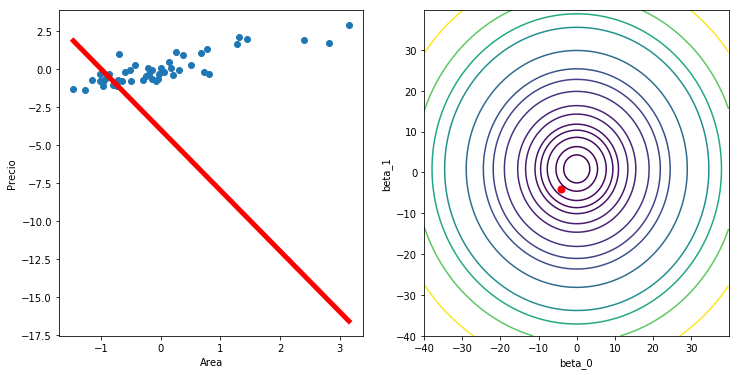



Regresión Lineal con betas [-2.39494776 -2.05187282]


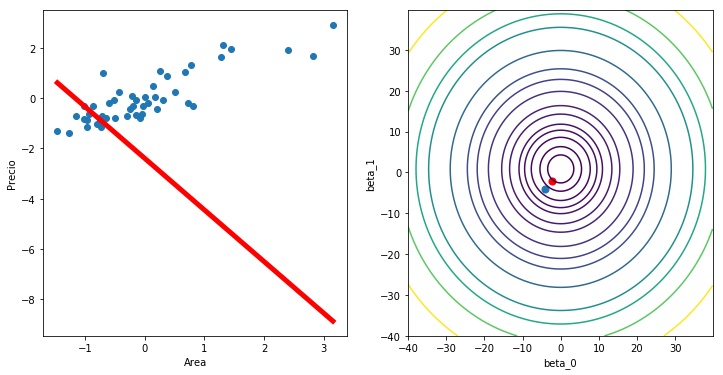



Regresión Lineal con betas [-1.43394369 -0.88545711]


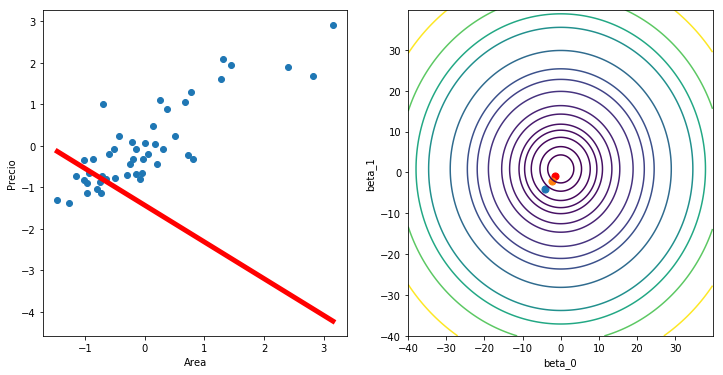



Regresión Lineal con betas [-0.85855506 -0.18708094]


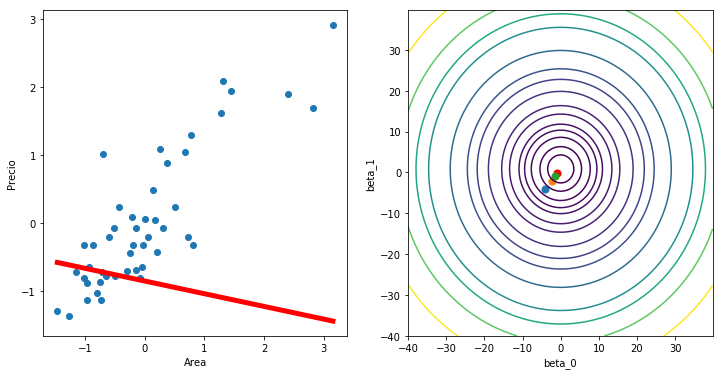



Regresión Lineal con betas [-0.51404863  0.23106267]


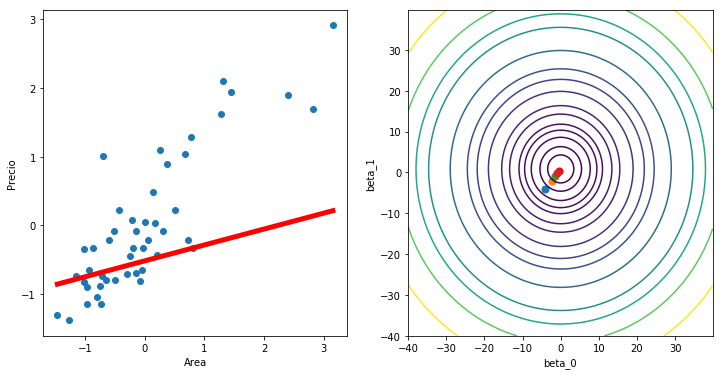



Regresión Lineal con betas [-0.3077799   0.48142069]


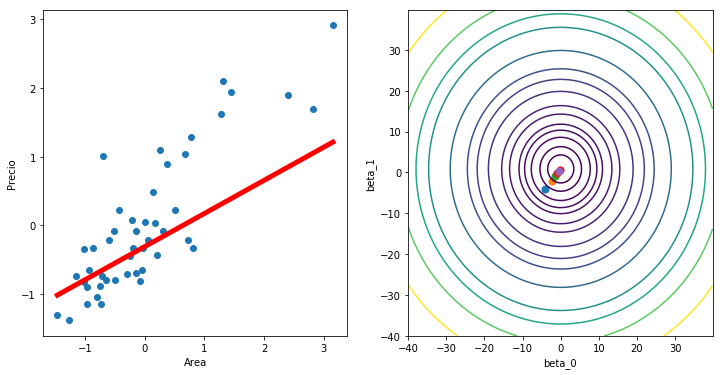



Regresión Lineal con betas [-0.1842792   0.63131929]


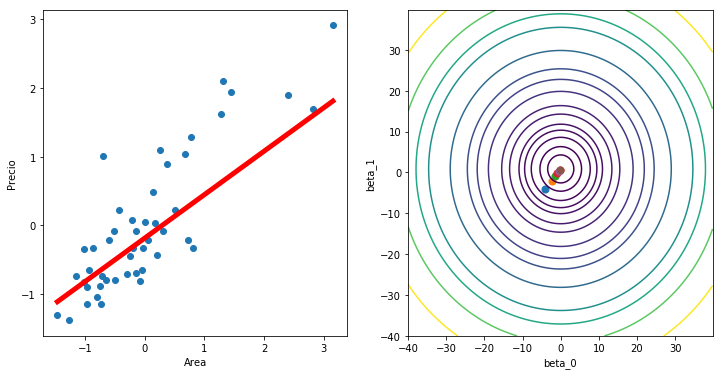



Regresión Lineal con betas [-0.11033476  0.72106912]


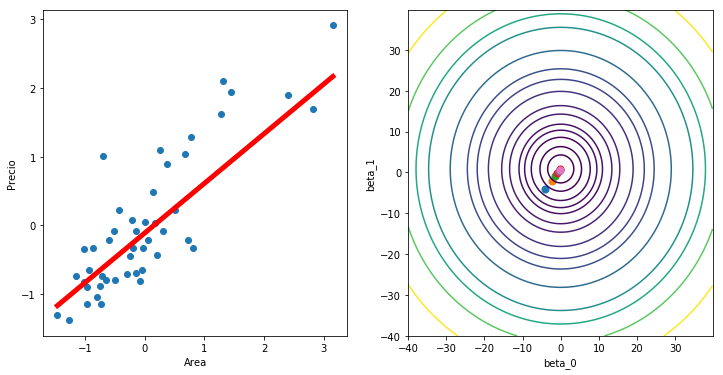



Regresión Lineal con betas [-0.0660615   0.77480566]


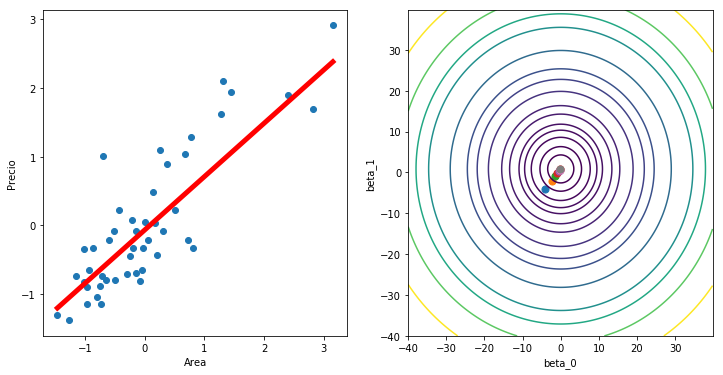



Regresión Lineal con betas [-0.03955346  0.8069797 ]


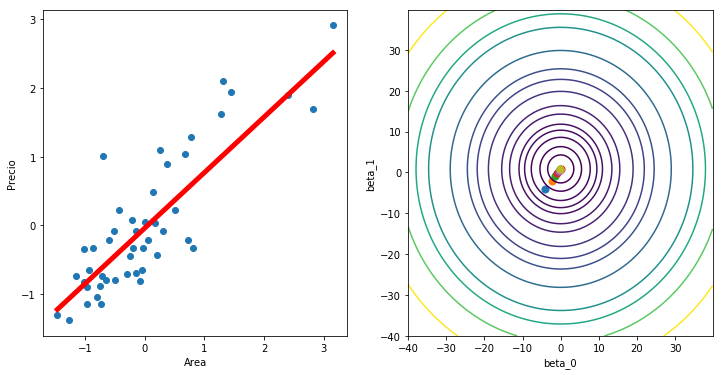

In [30]:
betas_ = betas[range(0, iters, 10), :-1]
for i, beta in enumerate(betas_):
    print('\n\nRegresión Lineal con betas', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax2.contour(beta0, beta1, funcion_costo_Df.T.values, niveles_contorno)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1], c='r', s=50)
    
    if i > 0:
        for beta_ in betas_[:i]:
            ax2.scatter(beta_[0], beta_[1], s=50)

    # gráfico de dispersión
    ax1.scatter(X, y)

    # Graficar la regresión lineal
    x = np.c_[np.ones(2), [X.min(), X.max()]]
    ax1.plot(x[:, 1], rl_y(beta, x), 'r', lw=5)
    ax1.set_xlabel('Area')
    ax1.set_ylabel('Precio')
    plt.show()

Estimated Betas

In [31]:
betas[-1, :-1]

array([-0.02492854,  0.82473065])

## <font color=#003d5c>Ecuaciones Normales (OLS)</font>

## $$ \beta = (X^T X)^{-1} X^T Y $$


In [32]:
beta = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))

In [33]:
beta

array([ -5.80624192e-17,   8.54987593e-01])

# <font color=#003d5c>Regresión usando Sklearn</font>

In [34]:
# importar librería


In [35]:
# Inicializar


In [36]:
# Ajustar


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

array([ -8.88030989e-17,   8.54987593e-01])

### <font color=#003d5c>Usando Descenso de Gradiente (Estocástico)*</font>

*Se diferencia del descenso de gradiente normal actualizando los pesos con cada ejemplo. Esto converge más rápido para grandes conjuntos de datos.

In [38]:
# Importar


In [39]:
# Inicializar


In [40]:
# Ajustar


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=False, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=100, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

array([ -8.30309105e-04,   8.53349811e-01])

# <font color=#003d5c>Comparando OLS y DG</font>

|Descenso de Gradiente|Ecuación Normal|
| :------------- | :------------- |
| Necesita escoger $\alpha$| No necesita escoger $\alpha$|
|Necesita muchas iteraciones | No necesita iteraciones|
|Trabaja bien incluso cuando $k$ es grande |Lento si $k$ es muy grande |
||Necesita calcular $(X^TX)^{-1}$|

# <font color=#003d5c>Regresión Lineal con múltiples variables</font>

Vamos a crear una nueva variable: $ area^2 $

,area,habitaciones,precio,area2
0,2104,3,399900,4426816
1,1600,3,329900,2560000
2,2400,3,369000,5760000
3,1416,2,232000,2005056
4,3000,4,539900,9000000


### <font color=#003d5c>Notaciones</font>

 * n = Número de registros o ejemplos
 * k = Número de variables
 * y = Precio
 * $x^{(i)}$ = variables del registro $i$

area        2400
area2    5760000
Name: 2, dtype: int64

* $x_j^{(i)}$ = valor de la variable $j$ del registro $i$

5760000

### <font color=#003d5c>Hipótesis:</font>

* Previamente:

### $$ \hat{y}_\beta(x) = \beta_0 + \beta_1 x_1 $$

donde $x_1$ = área

* Ahora:

### $$ \hat{y}_\beta(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$
donde $x_2$ = $área^2$

### <font color=#003d5c>Crear nueva matriz X y escalar</font>

array([[   2104, 4426816],
       [   1600, 2560000],
       [   2400, 5760000],
       [   1416, 2005056],
       [   3000, 9000000]], dtype=int64)

(array([  2.00068085e+03,   4.62083843e+06]),
 array([  7.86202619e+02,   4.05394589e+06]))

array([[ 0.13141542, -0.04786014],
       [-0.5096407 , -0.50835371],
       [ 0.5079087 ,  0.28100069],
       [-0.74367706, -0.64524355],
       [ 1.27107075,  1.08022201]])

array([[ 1.        ,  0.13141542, -0.04786014],
       [ 1.        , -0.5096407 , -0.50835371],
       [ 1.        ,  0.5079087 ,  0.28100069],
       [ 1.        , -0.74367706, -0.64524355],
       [ 1.        ,  1.27107075,  1.08022201]])

### <font color=#003d5c>Función de Costo</font>

El objetivo es estimar los parámetros $\beta$ que minimicen la suma de los residuos al cuadrado

### $$J(\beta)=\frac{1}{2n}\sum_{i=1}^n (\hat{y}_\beta(x^{(i)})-y_i)^2$$


### $$\hat{y}_\beta(x^{(i)}) = \sum_{j=0}^k \beta_j  x_j^{(i)}$$


### $$J(\beta)=\frac{1}{2n}\sum_{i=1}^n \left( \left( \sum_{j=0}^k \beta_j  x_j^{(i)}\right) -y_i \right)^2$$

Notar que $x^0$ se refiere a la columna de unos

### <font color=#003d5c>Algoritmo de descenso de gradiente</font>

Repetir hasta converger{

### $$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta)$$


}

mientras se actualiza simultáneamente j=0..k

$\alpha$ es la tasa de aprendizaje (learning rate)

In [49]:
beta_ini = np.array([0., 0., 0.])

# Cálculo de gradiente
def gradiente(beta, x, y):
    return 1 / x.shape[0] * np.dot((rl_y(beta, x) - y).T, x)

gradiente(beta_ini, X_, y)

array([  8.50383593e-17,  -8.54987593e-01,  -8.33162685e-01])

Text(0,0.5,'J(beta)')

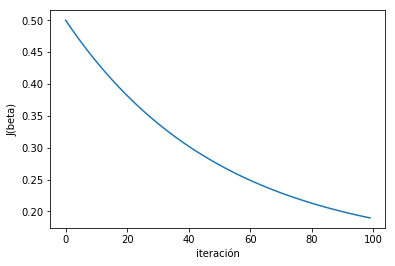

In [50]:
beta_ini = np.array([0., 0., 0.])
alpha = 0.005
iters = 100
betas = descenso_gradiente(X_, y, beta_ini, alpha, iters)

# Print iteration vs J
plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteración')
plt.ylabel('J(beta)')

Aparentemente la función de costo no es convergente
<br>
Aparentemente la función de costo no está convergiendo

Vamos a cambiar el valor de alpha e incrementar el número de iteraciones

Text(0,0.5,'J(beta)')

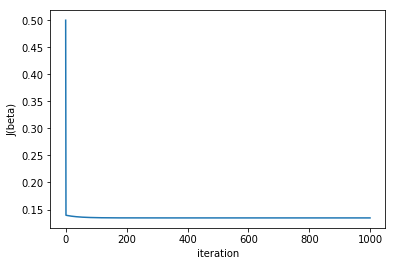

In [51]:
beta_ini = np.array([0., 0., 0.])
alpha = 0.5
iters = 1000
betas = descenso_gradiente(X_, y, beta_ini, alpha, iters)

# Print iteration vs J
plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)')

In [52]:
print('betas usando descenso de gradiente\n', betas[-1, :-1])

betas usando descenso de gradiente
 [ -7.91329177e-17   8.91147493e-01  -3.70307030e-02]


### <font color=#003d5c>Usando ecuaciones Normales</font>

In [53]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([ -7.26814831e-17,   8.91150925e-01,  -3.70341353e-02])

Diferencia

In [54]:
betas_ols - betas[-1, :-1]

array([  6.45143463e-18,   3.43234289e-06,  -3.43234289e-06])

# <font color=#003d5c>Haciendo predicciones</font> 

Predecir el precio cuando el área es 3000

Nota: recordar que la matriz X está escalada

In [55]:
x = np.array([3000., 3000.**2])

# scale
x_scaled = ss.transform(x.reshape(1, -1))
x_ = np.c_[1, x_scaled]
x_

array([[ 1.        ,  1.27107075,  1.08022201]])

In [56]:
y_pred = rl_y(betas_ols, x_)
y_pred

array([ 1.09271078])

In [57]:
y_pred = y_pred * y_std + y_mean
y_pred

array([ 475583.75451797])

# <font color=#003d5c>Usando sklearn</font>

Cuando usamos sklearn, no hay necesidad de crear el intercepto

Además Sklearn trabaja con Pandas

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Prediciendo

array([ 475583.75451797])

array([ 475458.36701776])

# <font color=#003d5c>Métrica de evaluación para problemas de regresión</font>

Las métricas de evaluación para problemas de clasificación, como **accuracy**, no son útiles para problemas de regresión. Necesitamos métricas de evaluación diseñadas para comparar **valores continuos**.

Aquí hay tres métricas de evaluación comunes para los problemas de regresión:

**Mean Absolute Error** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


MAE: 51990.9615107
MSE: 4115290102.06
RMSE: 64150.526904


Comparando estas métricas:

- ** MAE ** es el más fácil de entender, porque es el error promedio.
- ** MSE ** es más popular que MAE, porque MSE "castiga" errores más grandes, lo que tiende a ser útil en el mundo real.
- ** RMSE ** es aún más popular que MSE, porque RMSE es interpretable en las unidades "y".

Todas estas son **funciones de pérdida**, porque queremos minimizarlas.


# <font color=#003d5c>Comparación de la regresión lineal con otros modelos</font>

Ventajas de la regresión lineal:

- Simple de explicar
- Altamente interpretable
- El entrenamiento y la predicción del modelo son rápidos
- No se requiere Tuning (excluyendo la regularización)
- Las características no necesitan escala
- Puede funcionar bien con un pequeño número de observaciones
- Bien entendido

Desventajas de la regresión lineal:

- Presume una relación lineal entre las características y la respuesta
- El rendimiento (generalmente) no es competitivo con los mejores métodos de aprendizaje supervisado debido a un alto sesgo
- No se puede aprender automáticamente las interacciones de características